# Exercise Sheet 10
## Loading and pre-processing of data

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
# some preprocessing
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
Y = pd.DataFrame(cancer.target, columns = ["class"])
Y = Y.replace({0: "malignant", 1 : "benign"})
class_names = ['malignant','benign']

A nice explaination about decision trees and random forests can be found here: https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

# Question 1 - Decision Trees

### Q1 - 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# hint: https://scikit-learn.org/stable/modules/tree.html

#Creating the classifier object wiht a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=20)

# Fitting the model
clf.fit(X,Y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

### Q1 - 2

In [ ]:
import graphviz 
from sklearn import tree

my_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,
                      class_names = class_names,
                      filled=True, rounded=True,
                      special_characters=True)  

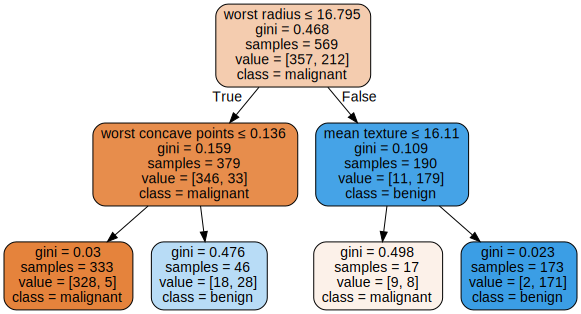

In [ ]:
graph = graphviz.Source(my_data) 
graph

### Q1 - 3


#### a)

*   In case of sample i, worst radius = 10, which is less than that of the root value. So we traverse the left subtree of the root node. Then we check for the worst concave points which is 0.1 and compare it with 0.136. Since it is smaller, we again traverse the left subtree. So, checking the third condition is immaterial now and we choose the class as **malignant**.

*   In case of sample ii, worst radius = 20. We compare it with the root node value which is 16.795. Since, it is greeater than the root node value, we traverse the right subtree of the root node. Then we check for the mean texture which is 35 and compare it with 16.11. Since, it is again greater, we traverse the right subtree again. So, now checking the third condition is immaterial now and we choose the class as **benign**.



#### b)

*   In case of sample iii, worst radius = 12, so we traverse the left subtree of the root node. Then we check for the worst concave points which is 0.25 and hence we traverse the right subtree. So, now checking the third condition is immaterial now and we choose the class as **benign**.

*   In case of sample iv, worst radius = 35, so we traverse the right subtree of the root node. Then we check for the mean texture which is 16 and hence we traverse the left subtree. So, now checking the third condition is immaterial now and we choose the class as **malignant**.


### Q1 - 4

In [ ]:
from sklearn.model_selection import train_test_split

# Randomly splitting the data into training and testing with a ratio of 3:1

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 20)


### Q1 - 5

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter list for optimization
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

# Creating the object for the decision tree classifier
clf2 = DecisionTreeClassifier(random_state=20)

# Instantiating the GridSearchCV object
clf2_cv = GridSearchCV(clf2,params, cv=5)

# Fitting it to data
clf2_cv.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=20,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


### Q1 - 6

In [ ]:
# Displaying the best parameters after the 5-fold cross validation
print("The best parameters are as follows")
print(clf2_cv.best_params_)
print("\n")
print("The best score for the best parameters is " + str(clf2_cv.best_score_))

The best parameters are as follows
{'max_leaf_nodes': 7, 'min_samples_split': 2}


The best score for the best parameters is 0.94593707250342


*   Hence, the best hyperparameters are max_leaf_nodes = 7 and min_samples_split = 2. 

*   Also the best score for the best parameters  = 0.946



### Q1 - 7

In [ ]:
from sklearn.metrics import accuracy_score

# Training the model on the hyperparameters found
clf3 = DecisionTreeClassifier(random_state=20, max_leaf_nodes=7, min_samples_split=2).fit(X_train,y_train)

# Testing it on the test data
y_pred = clf3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

# Displaying the test accuracy
print("The model's accuracy on the test set is " + str(accuracy))


The model's accuracy on the test set is 0.9020979020979021


### Q1 - 8

The disadvantages of decision tree is as follows.

*   **Lack of smoothness**.
*   **Lack of stability, high variance** - A small change in the data can cause a large change in the structure of the decision tree causing instability. 
*   It prone to **overfitting**.
*   **Affected by noise** - Little bit of noise can make it unstable which leads to wrong predictions.
*   **Not suitable for large dataset**s - If data size is large, then one single tree may grow complex and lead to overfitting. So in this case, we should use Random Forest instead of a single Decision Tree.

To overcome the disadvantages:


*   **To overcome over fitting** (too many splits): If we can limit the node size and the depth of the tree by pruning using cost-complexity criterion which defines the trade-off between goodness of fit and model .

*   We make the tree more robust by building an ensemble using the bootstarp aggregation where each tree is treated individually which lead to the decrease in variance  and also limit over-fitting without substantially increasing error due to bias; which is called the **random forest**. 










# Question 2 - Random Forests

### Q2 - 1

*   **Forest**  is a collection of many Decision trees rather averaging the prediction of trees.

*   **Random** means that we take a random sample of our training data before building the tree and also take a subset of features when splitting .

*   A **random forest** is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit over-fitting without substantially increasing error due to bias is why they are such powerful models. One way Random Forests reduce variance is by training on different samples of the data. It combines output class labels of the individual trees to a final consensus class label. 

*   Random forest uses **randomness** if there are many features and when we want to classify, random forest uses a subset of all the features for splitting each node in each decision tree. So it combines hundreds of decision trees and trains each one separately using the bootstrapping by taking a limited number of features, then making a final prediction by averaging the prediction of each individual tree. So, independent predictions from multiple decision trees are combined to produce a final classification.




### Q2 - 2

There are two popular arguments on why bagging works.

*   A limitation of Decision Trees is that they suffer from high variance. Using the method of bagging, the variance is averaged from multiple trees on different variants of the training set thereby improving the overall variance. 

*   Bagging is capable of having an equalization(also known as secondary effect) on the potential influence on examples. This in turn reduces the variance.

From a Bayesian point of view, Bagging works because:

*   It is an approximation to the optimal procedure of Bayesian model averaging, with an appropriate implicit prior.

*  Bagging effectively shifts the prior to a more appropriate region of model space. 








### Q2 - 3

In [ ]:
# Importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from itertools import chain 
import numpy as np

# Learning a classification of the breast cancer data with the RandomForestClassifier

#Creating the classifier object wiht a max depth of 2
clf4 = RandomForestClassifier(random_state=20)

# Converting target dataframe to numpy array
y = Y.values.tolist()
y = list(chain.from_iterable(y))
y = np.array(y)

# Fitting the classifier to the data
clf4.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
# Hyperparameter list for optimization
param_grid = { 
    'min_samples_split': [2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': list(range(10, 20)) #run before with wider range, but restricted to a subset for students to reduce run time
}


# Converting target dataframe of y_train to numpy array
y2_train = y_train.values.tolist()
y2_train = list(chain.from_iterable(y2_train))
y2_train = np.array(y2_train)


# Creating the object for the random forest classifier
clf5 = RandomForestClassifier(random_state=20)

# Instantiating the GridSearchCV object
clf5_cv = GridSearchCV(clf5,param_grid, cv=5)

# Fitting it to data
clf5_cv.fit(X_train,y2_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=20,
                                  

### Q2 - 4

In [ ]:
# Displaying the best parameters after the 5-fold cross validation
print("The best parameters are as follows")
print(clf5_cv.best_params_)
print("\n")
print("The best score for the best parameters is " + str(clf5_cv.best_score_))

The best parameters are as follows
{'max_features': 'auto', 'max_leaf_nodes': 15, 'min_samples_split': 2}


The best score for the best parameters is 0.955403556771546


*   Hence, the best hyperparameters are max_features = auto, max_leaf_nodes = 15 and min_samples_split = 2. 

*   Also the best score for the best parameters  = 0.955


### Q2 - 5

In [ ]:
from sklearn.metrics import accuracy_score

# Fitting the model on the best hyperparameters found
clf6 = RandomForestClassifier(random_state=20, max_features='auto', max_leaf_nodes=15, min_samples_split=2).fit(X_train,y2_train)

### Q2 - 6

In [ ]:
# Predicting the classes of the test set
y_pred =clf6.predict(X_test)
y_pred2 = y_pred.tolist()

# Storing the indices of the test dataset
idx = X_test.index.to_list()

for i in range(0,len(idx)):
  print("For index = " + str(idx[i]) + ", class = "+ str(y_pred2[i]))


For index = 269, class = benign
For index = 263, class = malignant
For index = 30, class = malignant
For index = 452, class = benign
For index = 214, class = malignant
For index = 181, class = malignant
For index = 32, class = malignant
For index = 248, class = benign
For index = 318, class = benign
For index = 352, class = malignant
For index = 317, class = malignant
For index = 52, class = benign
For index = 356, class = benign
For index = 45, class = malignant
For index = 496, class = benign
For index = 440, class = benign
For index = 467, class = benign
For index = 261, class = malignant
For index = 94, class = malignant
For index = 505, class = benign
For index = 427, class = benign
For index = 166, class = benign
For index = 29, class = malignant
For index = 16, class = malignant
For index = 129, class = malignant
For index = 77, class = malignant
For index = 3, class = malignant
For index = 453, class = benign
For index = 238, class = benign
For index = 394, class = benign
For i

In [ ]:
# Printing the number of samples in test data assigned to each class
d = {x:y_pred2.count(x) for x in y_pred2}
print(d)

{'benign': 84, 'malignant': 59}


### Q2 - 7

In [ ]:
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

# Displaying the test accuracy
print("The model's accuracy on the test set is " + str(accuracy))
print()
# Displaying the confusion matrix
print("The confusion matrix is as follows:")
print(cm)

The model's accuracy on the test set is 0.972027972027972

The confusion matrix is as follows:
[[83  3]
 [ 1 56]]


### Q2 - 8

In [ ]:
# Storing all the feature names in a list
feature_names = X.columns.to_list()

# Extract feature importances
f = pd.DataFrame({'features': feature_names, 'importance': clf6.feature_importances_}).sort_values('importance', ascending = False)

print(f)

                   features  importance
7       mean concave points    0.155255
22          worst perimeter    0.121300
23               worst area    0.115884
27     worst concave points    0.109546
6            mean concavity    0.075353
20             worst radius    0.066466
26          worst concavity    0.044549
0               mean radius    0.039732
13               area error    0.038943
3                 mean area    0.034723
2            mean perimeter    0.027355
12          perimeter error    0.025323
10             radius error    0.019157
24         worst smoothness    0.015974
28           worst symmetry    0.015184
1              mean texture    0.014486
21            worst texture    0.014091
5          mean compactness    0.013392
25        worst compactness    0.008686
29  worst fractal dimension    0.005334
4           mean smoothness    0.004986
11            texture error    0.004959
15        compactness error    0.004729
16          concavity error    0.004558


### Q2 - 9


# The most four most important features of the random forest classifier are as follows:

*   It estimates which variables are important in classification and does an unbiased estimate of error during the building process.

*   It works pretty well on large datasets, hence can be used in real-life scenario that uses huge amount of data for training and testing. 

*   It makes the decision trees more robust by building an ensemble and can also handle thousands of input variables without variable deletion. Also, it does not suffer from over-fitting.

*   It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.

For the **RandomForestClassifier** module of sklearn the important features are:

*   It is resposible for fitting a number of decision tree classifiers on various sub-samples of the dataset and improves the accuracy by averaging the scores of the decision trees. 

*   max_samples parameter is a very essential parameter which is used to control the sub-sample size.

*   If the default values of the classifier is kept, then it will lead to a fully grown tree which may be very large if the dataset is large. Hence, the parameters  max_depth, min_samples_leaf should be chosen so that a reasonable tree is obtained.

*   There is always a random permutation of the features at each split. Hence, finding the best split may be a challege. However, for a fixed fitting behaviour, random state must be fixed each time. 